# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Coursework<a class="tocSkip">

# Instructions  <a class="tocSkip">
    

- This is the assessed coursework for module ACSE-3: Numerical Methods for year 2019/20.


- This is independent work, you cannot work in groups.


- Each question below is equally weighted in terms of marks.


- You will be assessed on both your code as well as your supporting descriptions/discussions of the results you obtain.


- You may use NumPy and SciPy. If you use an algorithm (e.g. from SciPy) not explicitly mentioned in the question, then please explain which algorithm you are using and why you have chosen it.


- You should submit your solutions as a single self-contained Jupyter notebooks via Github classroom - please submit a version where you have run all of the cells and all the outputs/plots etc are visible without me having to run the notebook myself.


<br><br>

# DEADLINE:   5pm Sunday 5 Jan 2020 <a class="tocSkip">

<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla 
from scipy.integrate import odeint # Use odeint to solve a differential equation
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5. 

<br>

Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider a simple error metric given by the error in the solution at time $t=3$.

<br>

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

<br>

Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.  

<br>

What is the optimal value of $\alpha$ which minimises the error for this problem?

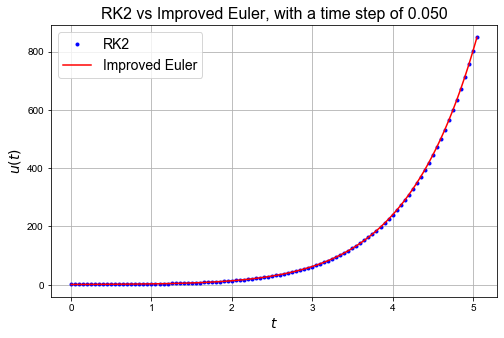

In [2]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        k1 = f(t, y)
        k2 = f(t + alpha*dt, y + alpha*dt*k1)
        y = y + (1-1/(2*alpha))*dt*k1+1/(2*alpha)*dt*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

# problem parameters
y0 = 1.0
dt = 0.05
t0 = 0.0
t_max = 5

# set up figure for verification
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

y_all_RK, t_all_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha=1)
ax1.plot(t_all_RK, y_all_RK, 'b.', label='RK2')

y_all, t_all = improved_euler(f, y0, t0, t_max, dt)
ax1.plot(t_all, y_all, 'r', label='Improved Euler')

y_all= y_ex(t_all_RK)
# ax1.plot(t_all, y_all, 'k--', label='Exact')

ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('RK2 vs Improved Euler, with a time step of {0:.3f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

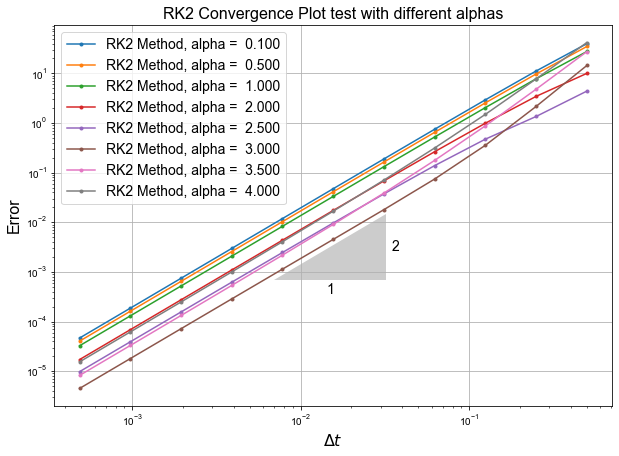

In [3]:
# RK2 method Convergence test for different alpha

# the range of time step sizes we will consider
dts = [0.5/(2**n) for n in range(0, 11)]
# Alpha values we will consider
# alpha_set = np.arange(0.1,4,0.7)
alpha_set = [0.1, 0.5, 1, 2, 2.5, 3,3.5, 4]

# set up figure
fig, axs = plt.subplots(1, 1, figsize=(10, 7))

for alpha in alpha_set:
    RK2_error = np.empty(len(dts))
    for (i, dt) in enumerate(dts):
        y_all_RK, t_all_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha)
        RK2_error[i] = np.linalg.norm(y_all_RK - y_ex(t_all_RK))/np.sqrt(len(y_all_RK))
    axs.loglog(dts, RK2_error, '.-', label='RK2 Method, alpha =  {0:.3f}'.format(alpha))


axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('Error', fontsize=16)
axs.set_title('RK2 Convergence Plot test with different alphas', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((7e-3, 7e-4), (2, 1), ax=axs,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

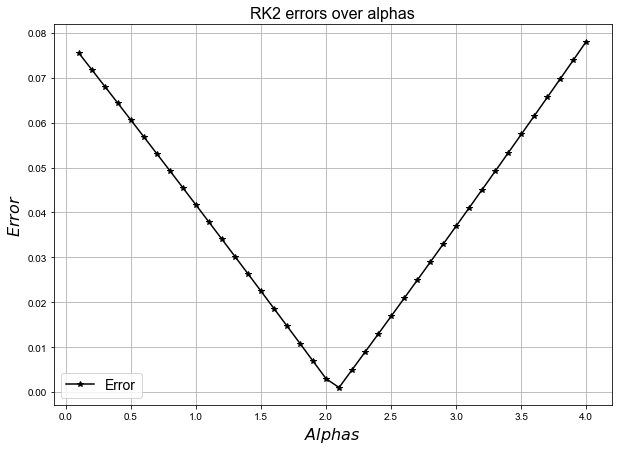

In [4]:
alpha_set = np.arange(0.1, 4.1, 0.1)
alpha_vs_error = np.empty(len(alpha_set))
y0 = 1
t0 = 0
t_max = 3.
dt = 0.04
num_dt = int(round(t_max/dt))
t = dt*np.linspace(0, num_dt, num_dt+1)


for k, alpha in enumerate(alpha_set):

    y_all_RK, t_all_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    alpha_vs_error[k] = np.linalg.norm(y_all_RK[-1] - y_ex(t_all_RK)[-1])/np.sqrt(1)

# set up figure
fig, axs1 = plt.subplots(1, 1, figsize=(10, 7))
axs1.plot(alpha_set, alpha_vs_error, 'k*-', label='Error')
axs1.set_xlabel('$Alphas$', fontsize=16)
axs1.set_ylabel('$Error$', fontsize=16)
axs1.set_title('RK2 errors over alphas', fontsize=16)
axs1.grid(True)
axs1.legend(loc='best', fontsize=14)


By observing the plot above, the optimal value of $\alpha$ that minimises the error in range $[0.1,4.0]$ is 2.1.

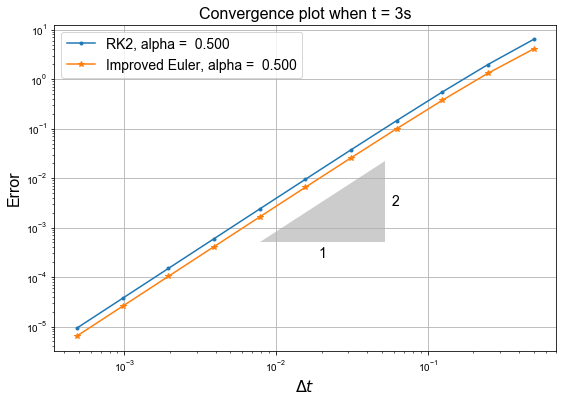

In [5]:
# the range of time step sizes we will consider
dts = [0.5/(2**n) for n in range(0, 11)]
# Alpha values we will consider
# alpha_set = np.arange(0.1, 4, 1)
# alpha_set = [0.1, 5, 1, 2, 3, 4]
alpha_set = [0.5]

# set up figure
fig, axs = plt.subplots(1, 1, figsize=(9, 6))

for alpha in alpha_set:
    RK2_error = np.empty(len(dts))
    IE_error = np.empty(len(dts))
    for (i, dt) in enumerate(dts):
        y_all_RK, t_all_RK = RK2_alpha(f, y0, t0, t_max, dt, alpha)
        y_all_IE, t_all_IE = improved_euler(f, y0, t0, t_max, dt)
        idx = np.where(t_all_RK == 3)
        t_RK_3 = t_all_RK[idx[0]]
        y_RK_3 = y_all_RK[idx[0]]
        y_IE_3 = y_all_IE[idx[0]] 
        RK2_error[i] = np.linalg.norm(y_RK_3 - y_ex(t_RK_3))/np.sqrt(len(y_RK_3))
        IE_error[i] = np.linalg.norm(y_IE_3 - y_ex(t_RK_3))/np.sqrt(len(y_IE_3))
    axs.loglog(dts, RK2_error, '.-', label='RK2, alpha =  {0:.3f}'.format(alpha))
    axs.loglog(dts, IE_error, '*-', label='Improved Euler, alpha =  {0:.3f}'.format(alpha))

# axs.loglog(dts, RK2_error, 'k.-', label='RK2 Method')

axs.set_xlabel('$\Delta t$', fontsize=16)
axs.set_ylabel('Error', fontsize=16)
axs.set_title('Convergence plot when t = 3s', fontsize=16)
axs.grid(True)
axs.legend(loc='best', fontsize=14)
annotation.slope_marker((7.8e-3, 5e-4), (2, 1), ax=axs,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

Therefore, the order of convergence is 2.

# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.

<br> 

Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. 

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

<br>

Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

<br>

Based on your observations implement another implicit two-level scheme which should provide qualitatively improved results compared with both forward and backward Euler. 

<br>

Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.

(-1.7, 1.7)

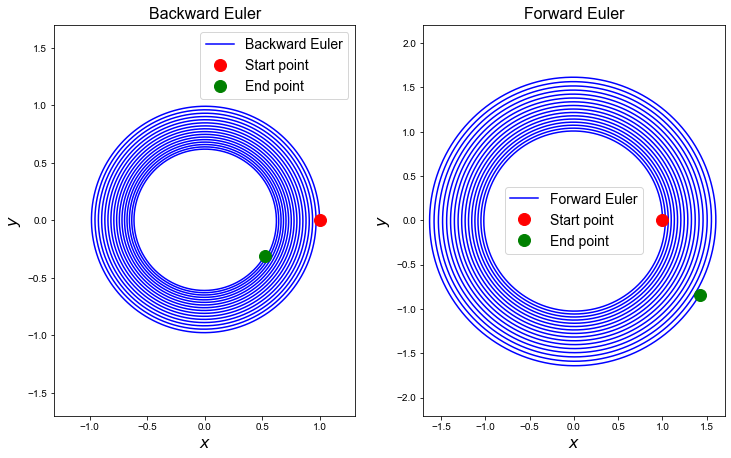

In [6]:
def f(t, u): 
    func = np.zeros_like(u)
    func[0] = -u[1]
    func[1] =  u[0]   
    return func

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

def backward_euler(f, u0, t0, t_max, dt):
    
#     Define a function g for solving y in the next time step
    def g(y_nxt, y_k, dt, t):
        return y_nxt - y_k - dt * f(t, y_nxt)
    
    y_k = np.array(u0)
    t_k = np.array(t0)
    y_all = [u0]
    t_all = [t0]
    
    while t_k < t_max:
        
        # Forward Euler inisialises guess for next y
        y_nxt = y_k + dt*f(t_k, y_k) 
        
        t_k = t_k + dt
        t_all.append(t_k)
        
        y_nxt_true, itr_num = newton_system(g, y_nxt, y_k, dt, t_k)
        y_k = y_nxt_true
        y_all.append(y_k)
        
    return np.array(y_all), np.array(t_all)


def jacobian(g, dy, y_nxt, y_k, dt, t):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(y_nxt),len(y_nxt)))
    f0 = g(y_nxt, y_k, dt, t)
    for j in range(len(y_nxt)):
        # always start from y
        y_inc = y_nxt.copy()
        # increment only the j-th entry by dt
        y_inc[j] +=  dy
        # evaluate f at this incremented y
        f1 = g(y_inc, y_k, dt, t)
        # numerical derivative, place the vector result 
        # in the appropriate column of J   
        J[:,j] = (f1 - f0)/dy

    return J

def newton_system(g, y_nxt, y_k, dt, t, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of dt1, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    
    for it in range(max_its-1):
        J = jacobian(g, h, y_nxt, y_k, dt, t)
        dy = sl.solve(J, -g(y_nxt, y_k, dt, t))
        y_nxt += dy
        if sl.norm(dy, np.inf) < atol:
            return y_nxt, it+1
    print('Hit max_its without converging')

y = np.zeros(2)
y[0] = 1
y[1] = 0
t0 = 0
t_max = 100
dt = 0.01

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout(w_pad=4)

u, t = backward_euler(f, y, t0, t_max, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Backward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

u, t = forward_euler(f, y, t0, t_max, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Forward Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7)


By plotting the "conservation law" vs time, we can find out how the systems given by solvers behave.
Radius should be constant:
$$ r(t) := \sqrt{x(t)^2 + y(t)^2} = r(0), $$


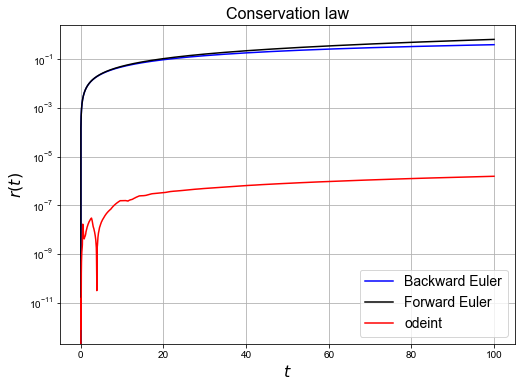

In [7]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

u, t = backward_euler(f, y, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Backward Euler')

u, t = forward_euler(f, y, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Forward Euler')

# add in odeint solution

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

t = np.arange(t0, t_max, dt)
# solve using odeint
# odeint can integrate a system of ordinary differential equations
u = odeint(f, y, t, tfirst=True)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'r', label='odeint')

ax1.legend(loc='best', fontsize=14);
ax1.grid(True)

(-1.7, 1.7)

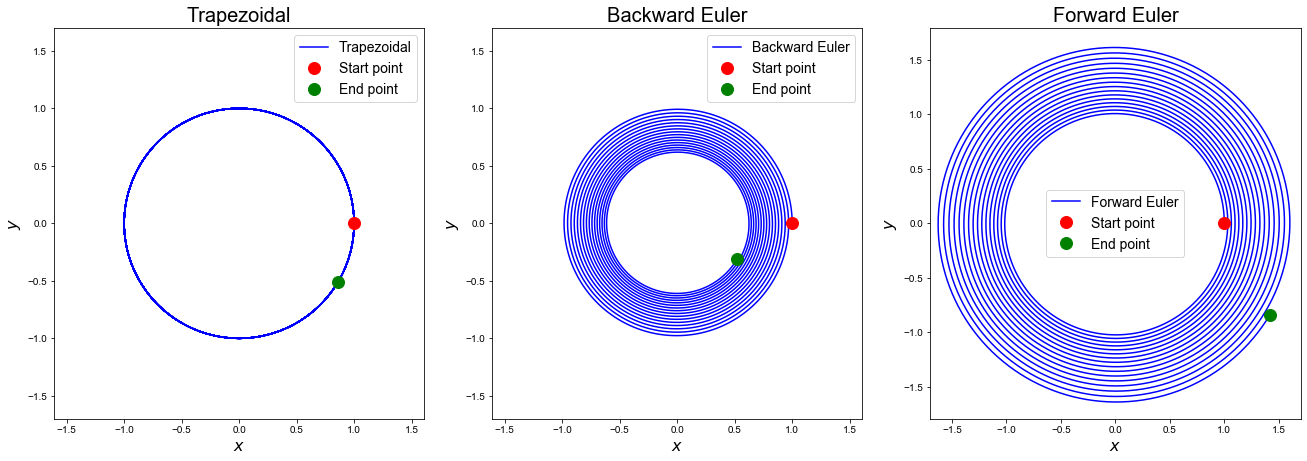

In [8]:
# Trapezoidal Scheme

def Trapezoidal(f, u0, t0, t_max, dt):
    
#     Define a function g for solving y in the next time step
    def g(y_nxt, y_k, dt, t):
        return y_nxt - y_k - dt/2 * (f(t, y_nxt) + f((t-dt), y_k))
    
    y_k = np.array(u0)
    t_k = np.array(t0)
    y_all = [u0]
    t_all = [t0]
    
    while t_k < t_max:
        
        # Forward Euler inisialises guess for next y
        y_nxt = y_k + dt*f(t_k, y_k) 
        
        t_k = t_k + dt
        t_all.append(t_k)
        
        y_nxt_true, itr_num = newton_system(g, y_nxt, y_k, dt, t_k)
        y_k = y_nxt_true
        y_all.append(y_k)
        
    return np.array(y_all), np.array(t_all)

y = np.zeros(2)
y[0] = 1
y[1] = 0
t0 = 0
t_max = 100
dt = 0.01

# set up figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.tight_layout(w_pad=4)

# Plot result of trapizoidal
u, t = Trapezoidal(f, y, t0, t_max, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Trapezoidal')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Trapezoidal', fontsize=20)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)

# Plot result of Backward Euler
u, t = backward_euler(f, y, t0, t_max, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Backward Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Backward Euler', fontsize=20)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7)

#Plot result of Forward Euler
u, t = forward_euler(f, y, t0, t_max, dt)
ax3.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax3.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax3.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('Forward Euler', fontsize=20)
ax3.axis('equal')
ax3.legend(loc='best', fontsize=14)
ax3.set_xlim(-1.7,1.7)
ax3.set_ylim(-1.7,1.7)

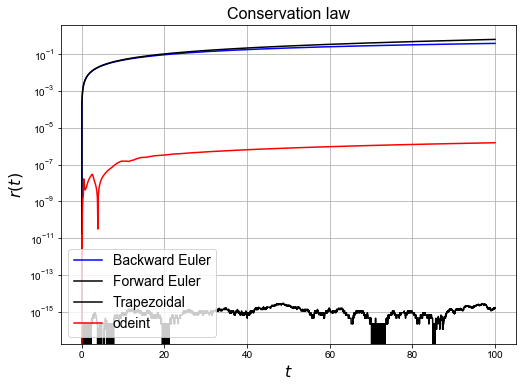

In [9]:
# set up figure for plotting error
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

u, t = backward_euler(f, y, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='Backward Euler')

u, t = forward_euler(f, y, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Forward Euler')

u, t = Trapezoidal(f, y, t0, t_max, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Trapezoidal')

# add in odeint solution

# initial condition
state0 = np.array([1.0, 1.0, 1.0])

t = np.arange(t0, t_max, dt)
# solve using odeint
# odeint can integrate a system of ordinary differential equations
u = odeint(f, y, t, tfirst=True)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'r', label='odeint')

ax1.legend(loc='best', fontsize=14);
ax1.grid(True)

By obsertation, the conservation law graph shows that trapezoidal method has conserved the radius the most among the three schemes.

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below).

The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.



<br>

Do you observe the expected order of convergence?

<br>

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

<br>

Throughout this question you may assume for simplicity a uniform mesh.

In [10]:
# some useful function from the lecture

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

# don't need the composite version of Simpson's rule here - want the version
# that is able to integrate over a single interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))

    # Return our running total result
    return I_S

# now a function to reconstruct the p/w linear function
def pwlinear(x_nodes, y_nodes, x):
    """Function to return f_h(x) at locations given in x, 
    with top hat functions on a mesh given by x_nodes, and
    corresponding weights given in y_nodes.
    """
    val = np.zeros_like(x)
    # loop over x values
    for i in range(len(x)):
        # which mesh node is directly to the left of x[i] ?
        node = np.where( x[i] >= x_nodes )[0][-1]
        # because of the greater than or equals above, deal with problem of hitting last node
        node = np.minimum(len(x_nodes)-2,node)
        # add together the contributions from the two hat functions at this x location - 
        # the hat functions centred on "node" (to the left)
        phi_node = hat_function(node, x_nodes)
        # and "node+1" (to the right)
        phi_node_plus_1 = hat_function(node+1, x_nodes)
        # now take the weighted sum of these two hat functions
        val[i] = y_nodes[node]*phi_node(x[i]) + y_nodes[node+1]*phi_node_plus_1(x[i])
    return val

# Function from lecture 1 for RMS error comparison
def BVP_AD_central_stretch_mesh(L, U, kappa, CE, N, Xfn):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    with a mesh stretching given by the function Xfn
    """
    dxi = 1. / N
    xi = np.linspace(-dxi / 2, dxi / 2 + 1, N + 2)
    x = Xfn(xi)
    kappat = np.zeros_like(x)
    Ut = np.zeros_like(x) 
    for i in range(1, N + 1):
        Xxi = (x[i+1] - x[i-1]) / (2 * dxi)
        Xxixi = (x[i+1] - 2*x[i] + x[i-1]) / dxi**2
        Ut[i] = (1. / Xxi) * U + (Xxixi / (Xxi**3)) * kappa
        kappat[i] = (1. / Xxi**2) * kappa      
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    for i in range(1, N + 1):
        A[i, i - 1] = kappat[i] / (dxi**2) + 0.5 * Ut[i] / dxi
        A[i, i] = -2. * kappat[i] / dxi**2
        A[i, i + 1] = kappat[i] / (dxi**2) - 0.5 * Ut[i] / dxi
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C

In this question, we are solving for:

$$\frac{\partial {u}}{\partial {x}} = \frac{1}{Pe}\frac{\partial^2 {u}}{\partial {x}^2},$$
It is equivalent to: $$ u'' - Pe*u' = f,\;\;\;\; where  f \equiv 0. $$

with auxiliary conditions

$${u}(0) = 0 =\,u_L , \;\;\;\; {u}(1)= 1 = \,u_R. $$

So we need to calculate the solution on the interval $[0,1].$

The problem consists of diffusion and advection terms. Similar to the problem set in lecture 11 5.4, to solve the problem we need to find the discritisation matrix for both terms. The RHS function will need to include boundary data.

In our case,
$$u_h := \sum_{j=0}^{n} u_j\,\phi_j 
= \sum_{j=1}^{n-1} u_j\,\phi_j + u_0\,\phi_0 + u_n\,\phi_n = \sum_{j=1}^{n-1} u_j\,\phi_j + u_n\,\phi_n,$$ because $$\,u_0 = u_L = 0. $$
Turn our question into weak form and subsitute $u_h$ into the equation. The integral in the LHS can be written as:
\begin{align*}
-\int_0^1 u_h'\phi_i' \,dx - Pe\int_0^1 u_h'\phi_i \,dx
&= 
-\sum_{j=1}^{n-1} u_j\,\int_0^1 \,\left(\phi_j'\phi_i'\right)\,dx - u_n\int_0^1\, \phi_n'\phi_i\,dx - Pe\left(\sum_{j=1}^{n-1} u_j\, \int_0^1 \,\phi_j'\phi_i\, dx + u_n\int_0^1\, \phi_n'\phi_i\,dx\right)\ \\[10pt]
\end{align*}

$$\text{for}\;\;\;\; i=1, 2,\ldots, n.$$

Move the boundary term to the RHS we get:
$$
-\sum_{j=1}^{n-1} u_j\,\int_0^1 \,\left(\phi_j'\phi_i'\right)\,dx - Pe\sum_{j=1}^{n-1} u_j\, \int_0^1 \,\phi_j'\phi_i\, dx = u_n\int_0^1\, \phi_n'\phi_i\,dx + Pe*u_n\int_0^1\, \phi_n'\phi_i\,dx
$$
Let $$ A_{ij} = \int_0^1 \,\phi_j'\phi_i\,  dx \;\;\;\;\;\;\text{for}\;\;\;\; i=0, 1,\ldots, n; \;\; j=0, 1,\ldots, n.  $$

Therefore, $$ \boldsymbol{u}\left(-K-Pe*A\right)\ = RHS$$

Solve for the advection discretisation matrix A: $$A_{ii}, A_{i,i+1} \;\text{and} \;A_{i,i-1}: $$


\begin{align*}
A_{ii}  
&= 
\int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_j(x)'\,  dx\\[10pt]
& = 
\int_{x_{i-1}}^{x_{i}} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\frac{1}{\Delta x_{i-1}}\,  dx + \int_{x_{i}}^{x_{i+1}} \,\frac{x_{i+1} - x}{\Delta x_{i}}\,\left(-\frac{1}{\Delta x_{i}}\right)\,  dx \\[10pt]
& = 
\frac{1}{\Delta x_{i-1}^2} \int_{0}^{\Delta x_{i-1}} \,s\,  ds - \frac{1}{\Delta x_{i}^2}\int_{0}^{\Delta x_{i}} \,t\,  dt
\;\;\;\;\;\;(\text{where}\;\;\; s:=x - x_{i-1},\;\;\;
t:=x_{i+1} - x)\\[5pt]
& = 
\frac{1}{\Delta x_{i-1}^2}\frac{\Delta x_{i-1}^2}{2} - \frac{1}{\Delta x_{i}^2}\frac{\Delta x_{i}^2}{2} \\[10pt]
& = 
\frac{1}{2}-\frac{1}{2} \\[5pt]
& = 0
\end{align*}

Similarly,

\begin{align*}
A_{i,i-1} 
&= 
\int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i-1}(x)'\,  dx\\[10pt]
& = 
\int_{x_{i-1}}^{x_i} \,\frac{x - x_{i-1}}{\Delta x_{i-1}}\,\left(-\frac{1}{\Delta x_{i-1}}\right)\,  dx \\[10pt]
& = 
-\frac{1}{\Delta x_{i-1}^2} \; \frac{\Delta x_{i-1}^2}{2} \\[10pt]
& = 
-\frac{1}{2} \\[5pt]
\end{align*}

\begin{align*}
A_{i,i+1} 
&= 
\int_{x_{i-1}}^{x_{i+1}} \,\phi_i(x)\,\phi_{i+1}(x)'\,  dx\\[10pt]
& = 
\int_{x_i}^{x_{i+1}} \,\frac{x_{i+1} - x}{\Delta x_i}\,\left(\frac{1}{\Delta x_i}\right)\,  dx \\[10pt]
& = 
\frac{1}{\Delta x_i^2} \; \frac{\Delta x_i^2}{2} \\[10pt]
& = 
\frac{1}{2} \\[5pt]
\end{align*}

Variable $n$ is the last node index. The integration in the advection term of RHS is
\begin{align*}
\int_{x_{n-1}}^{x_n}\, \phi_n'\phi_i\,dx
& = 
\int_{x_{n-1}}^{x_n} \,\frac{1}{\Delta x_{n-1}}\, \frac{x - x_{n-1}}{\Delta x_{n-1}},  dx \\[10pt]
& = 
\frac{1}{\Delta x_{n-1}^2} \int_{0}^{\Delta x_{n-1}} \,s^2\,  ds 
\;\;\;\;\;\;(\text{where}\;\;\; s:=x - x_{n-1})\\[10pt]
& = 
\frac{1}{\Delta x_{n-1}^2} \; \frac{\Delta x_{n-1}^2}{2} \\[10pt]
&=
\frac{1}{2} \\[5pt]
\end{align*}

As a result, the boundary data for advection term we should consider in RHS is $0.5*Pe*u_L$ and  $0.5*Pe*u_R$.
Let's construct the discretisation matrix for advection and diffusion to solve the problem.

error (RMS) =  0.0034451449195543726


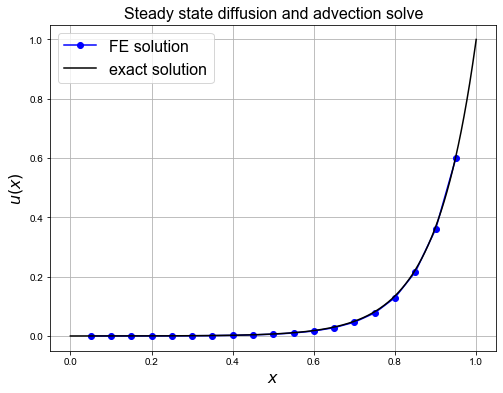

In [11]:
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
def f(x):
    return 0

# Define parameters
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1

uL = 0
uR = 1

N_elements_CG = 20
N_nodes_CG = N_elements_CG + 1

x_nodes = np.linspace(0, 1 , N_nodes_CG )
dx = np.diff(x_nodes)
# space to store our discretisaton matrices
K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
A = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
RHS = np.zeros(N_nodes_CG - 2)

# construct discretisation matrix for advection term
A = np.diag(np.zeros((N_nodes_CG - 2, )), k=0) \
    - np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=-1) \
    + np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=1)

# construct discretisation matrix for second deriv
K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
    - np.diag(1. / dx[1:-1]   , k=-1) \
    - np.diag(1. / dx[1:-1]   , k=1)

# form RHS vector by integrating function f multiplied by basis function
# loop over internal nodes
for node in range(1, N_nodes_CG - 1):
    # and integrate our function multiplied by the corresponding cts basis function  
    phi_i = hat_function(node, x_nodes)
    integrand = lambda x : f(x) * phi_i(x)
    # we need a higher number of intervals to do this accurately with non-uniform mesh
    # but trivial if we split the integrals over each individual element ( as we would
    # with assembly of course)
    RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
    
# Add in the extra entries due to the inhomogeneous Dirichlet BCs

# At the left the integral is only non-zero when phi_i and phi_0 both have
# support - this only occurs over the first element. The integrand is then
# uL multiplied by the derivative of \phi_1 in the first cell (1/dx[0])
# multiplied by the derivative of \phi_0 in the first cell (-1/dx[0]).
# This is a constant, and hence to do the integral we just need to 
# multiply by the size of the cell (dx[0]).
# We also need to add the advection term :
RHS[0] = RHS[0] + (uL * 1/dx[0] * (-1/dx[0]))*dx[0] + Pe * uL  * 0.5
# and similarly for the RHS
RHS[-1] = RHS[-1] + (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] + Pe * uR * 0.5

Disc = (-K - Pe*A)
u = sl.solve(Disc, RHS)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion and advection solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'bo-', label='FE solution')
x_fine = np.linspace(0, 1, 1000)
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);
ax1.grid(True)

print('error (RMS) = ', 
      sl.norm(u - u_exact(x_nodes[1:-1]) )
      /np.sqrt(len(u)) )

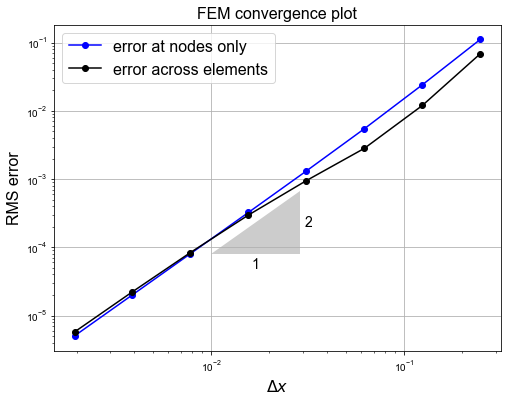

In [12]:
# Convergence Analysis
# some meshes of increasingly finer resolution to loop over
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns)))

for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    A = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    # construct discretisation matrix for advection term
    A = np.diag(np.zeros((N_nodes_CG - 2, )), k=0) \
        - np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=-1) \
        + np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=1)

    # construct discretisation matrix for second deriv
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)
    
    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
        
    # Add in the extra entries due to the inhomogeneous Dirichlet BCs
    # We need to plus the diffusion and advection terms to the first and last entries of RHS:
    RHS[0] = RHS[0] + (uL * 1/dx[0] * (-1/dx[0]))*dx[0] + uL * Pe * 0.5
    # and similarly for the RHS
    RHS[-1] = RHS[-1] + (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] + Pe * uR * 0.5

    Disc = (-K - Pe*A)
    u = sl.solve(Disc, RHS)
    
    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('FEM convergence plot', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='error across elements')
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)
annotation.slope_marker((1e-2,8e-5), (2, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
# annotation.slope_marker((1./np.array(Ns)[2], errors[1,2]), (2, 1), ax=ax1,
#                         size_frac=0.15, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

### Observation

- The FEM in this problem is second-order accurate.

Our choice for finite difference solver is central difference using the sample code from lecture 7. It is a second-order-accurate scheme.

Let's implement the scheme to our problem and compare the error with FEM result.

In [13]:
def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C

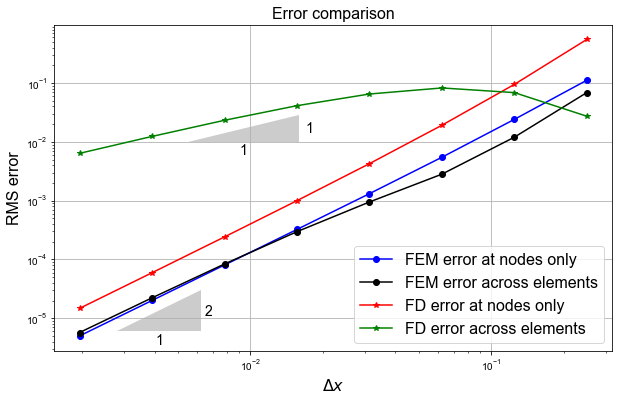

In [14]:
Ns = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(Ns))) # FEM error
errors_central = np.zeros((2,len(Ns))) # Central scheme error

for i, N in enumerate(Ns):
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # space to store our discretisaton matrices
    K = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    A = np.zeros((N_nodes_CG - 2, N_nodes_CG - 2))
    RHS = np.zeros(N_nodes_CG - 2)

    # construct discretisation matrix for advection term
    A = np.diag(np.zeros((N_nodes_CG - 2, )), k=0) \
        - np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=-1) \
        + np.diag(0.5*np.ones((N_nodes_CG - 3, )), k=1)

    # construct discretisation matrix for second deriv
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:] , k=0) \
        - np.diag(1. / dx[1:-1]   , k=-1) \
        - np.diag(1. / dx[1:-1]   , k=1)
    
    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )
        
    # Add in the extra entries due to the inhomogeneous Dirichlet BCs
    # We need to plus the diffusion and advection terms to the first and last entries of RHS:
    RHS[0] = RHS[0] + (uL * 1/dx[0] * (-1/dx[0]))*dx[0] + uL * Pe * 0.5
    # and similarly for the RHS
    RHS[-1] = RHS[-1] + (uR * (-1/dx[-1]) * (1/dx[-1]))*dx[-1] + Pe * uR * 0.5

    Disc = (-K - Pe*A)
    u = sl.solve(Disc, RHS)
    
    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    # Compute the nodal error for central difference scheme
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    errors_central[0, i] = np.linalg.norm( C - u_exact(x)) / np.sqrt(len(x))
    
    # now let's do the RMS on a fine mesh to approximate the L2 norm
    x_fine = np.linspace(x_nodes[1],x_nodes[-2],1000)
    errors[1,i] = sl.norm(pwlinear(x_nodes[1:-1], u, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    # Compute the element error for central difference scheme
    errors_central[1,i] = sl.norm(pwlinear(x_nodes[1:-1], C, x_fine) - u_exact(x_fine)) \
                        / np.sqrt(len(x_fine))
    
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Error comparison', fontsize=16)
ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='FEM error at nodes only')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='FEM error across elements')
ax1.loglog(1./np.array(Ns), errors_central[0,:], 'r*-', label='FD error at nodes only') 
ax1.loglog(1./np.array(Ns), errors_central[1,:], 'g*-', label='FD error across elements') 
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)
annotation.slope_marker((5.5e-3, 1e-2), (1, 1), ax=ax1,
                         size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((2.8e-3, 6e-6), (2, 1), ax=ax1,
                        size_frac=0.15, pad_frac=0.05, text_kwargs = dict(fontsize = 14))


### Observations

- Central difference scheme is first-order accurate across elements.
- By comparison, the finite difference method gives out larger error than finite element method across different $\Delta x$.
- Larger $\Delta x$ is not good for this example when implementing FD scheme.

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion.

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and generalise it to include advection.

Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

Our PDE problem (include advection) is:
$$\frac{\partial u}{\partial t} + U\frac{\partial u}{\partial x} = \kappa\frac{\partial^2 u}{\partial x^2}, $$


with homogeneous Neumann bounday conditions, so we don't need to subtract boundary terms from the RHS vector. We also don't have to do do anything to discretisation matrix relate to boundary condition.

Turn the problem into weak form:

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx + U\int_I \,u'\,v\,dx= 0, \;\;\;\;\forall \;\; v\in V.$$

Remember the approximate solution function without excluding the boundary data:

$$u_h := \sum_{j=0}^{n} u_j\,\phi_j,$$

With the finite-dimensional space ($V_h$ with a basis given by $\phi_i$), discretise the system into matrix form:

\begin{align*} 
\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx +  U\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i \,dx &= 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n \\[10pt]
\iff
\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{i,j} + \kappa\sum_{j=0}^{n} u_j\, K_{ij} + U\sum_{j=0}^{n} u_j\,A_{ij} &= 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.
\end{align*}
Therefore, $$
M\, \frac{d \boldsymbol{u}}{d t} + \kappa\, K\,\boldsymbol{u} + U\,\boldsymbol{u} A = \boldsymbol{0},
$$

Rearrange it to:
$$ \left( M + \theta\,\Delta t,(\kappa\, K+UA) \right)\boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,(\kappa\, K+UA)\right) \boldsymbol{u}^{n}.$$

Derivation of $M_{i,j}$(mass matrix) and $ K_{ij}$(diffusion) can be obtain from lecture 11, and $A_{i,j}$(advection) can be obtain from coursework $Q3$ above. Replace time derivative with finite difference approximation and implement 'Theta method' addressed in lecutre 8. Changing values of $\theta$ will change the time stepping method( Forward Euler, Backward Euler and Crank-Nicolson).

\begin{align*} 
\text{When $\theta$} &=0: \text{Forward Euler}\\[10pt]
& = 
\frac{1}{2}:\text{Crank - Nicolson}\\[10pt]
& = 
1:\text{Backward Euler}\\[10pt]
\end{align*}

We can construct connectivity matrix to do local assemblely for mass matrix and discretisation matrix. When performing local assembly and then global assembly, transform $x$ to reference element $\xi$. This function  `assembly_global` maps the physical and reference coordinate for us.

After matrix construction, we can solve for concentration $u$.
Let's implement it in the following code.

In [15]:
# Useful functions from lecture 12
# Mesh generation
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

# Generate connectivity matrix
def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix
def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x
def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight
def assembly_local(M, K, A1, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  The current version of M and K are passed in here
    and the local contribitions added in to them.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phi_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                # dx/2 in the line above is the Jacobian determinant 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                phi_phix += weight[gi] * phi[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix   
            A1[i_global, j_global] = A1[i_global, j_global] + phi_phix   
            
def assembly_global(M, K, A1, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, A1, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented') 
        
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

In [16]:
# Initial parameters
U = 1
x0 = 0.5
t = 0.05

# domain size
Lx = 3.
kappa = 0.01

# mesh data
N_nodes_CG = 51
N_elements_CG = N_nodes_CG - 1

# define some numerical parameters
N_loc = 2
N_gi = 3

# generate mesh
x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
connectivity_matrix = connectivity(N_loc, N_elements_CG)

# time stepping
dt = 0.001
t = 0.05
t_end = 1.05
theta = 0.
u_ic = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)

# we recall from an earlier lecture that for explicit time-stepping we should keep an 
# eye on the size of the "r parameter"
print('r parameter: ', kappa*dt/(np.min(dx)**2))

# set-up things we need for our discretisation
# the basis functions defined on our reference element
phi = shape(N_loc, N_gi)

# quadrature weights
weight = quadrature(N_gi)

# allocate space to store our discretisation matrices
M = np.zeros((N_nodes_CG, N_nodes_CG))
K = np.zeros((N_nodes_CG, N_nodes_CG)) # diffusion discretisation matrix
A1 = np.zeros((N_nodes_CG, N_nodes_CG)) # advection discretisation matrix

# assemble the individual discretisation matrices
assembly_global(M, K, A1, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

# and combine them into our final matrix system
A = M + dt*theta*(kappa*K+U*A1)
RHS_matrix = M - dt*(1-theta)*(kappa*K+U*A1)

# and finally time step
u_old = np.copy(u_ic)
while t<t_end:
    b = RHS_matrix @ u_old.T 
    apply_bcs(A, b, 0, 0, bc_option=0) # - Neumann case
    u = sl.solve(A, b)
    u_old = np.copy(u)
    t += dt

r parameter:  0.0027777777777778143


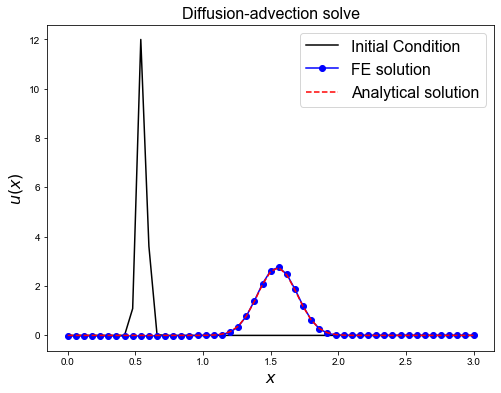

In [17]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Diffusion-advection solve', fontsize=16)

ax1.plot(x_nodes, u_ic, 'k-', label='Initial Condition')
ax1.plot(x_nodes, u, 'bo-', label='FE solution')

# Analytical solution
u_anal =  adv_diff_analytical_solution(U, kappa, x0, x_nodes, t_end)
ax1.plot(x_nodes, u_anal, 'r--', label='Analytical solution')
ax1.legend(loc='best', fontsize=16);

## Convergence plot

Quote from Q3: Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

We are going to vary $\Delta x$ and fix $\Delta t$ first, and then vary $\Delta t$ and fix $\Delta x$. Two convergence plot will be generated.

Combination of physical and numerical parameters might result in a unstable calculation. We can print out non-dimensional/stability parameters: $PE_c$, $CFL$ and $r-parameters$ to check if they're within the constraints.


In [18]:
# Initial parameters
U = 1.
x0 = 0.5
t = 0.05

# domain size
Lx = 3.
kappa = 0.01

# mesh data
# Ns = [2**p for p in range(16, )]
Ns = [p for p in range(10, 301, 20)]

# define some numerical parameters
N_loc = 2
N_gi = 3

# time stepping
t = 0.05
t_end = 1.05
dt = 0.001
theta_list = [0., 1./2, 1.]
# u_ic = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)

# set-up things we need for our discretisation
# the basis functions defined on our reference element
phi = shape(N_loc, N_gi)

# quadrature weights
weight = quadrature(N_gi)

errors = np.zeros((3,len(Ns))) # FE, BE, Crank
                  
# Fix dx, vary dx
for i, N in enumerate(Ns):
    t = 0.05
    N_elements_CG = N
    N_nodes_CG = N_elements_CG + 1
    
    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG)) # diffusion discretisation matrix
    A1 = np.zeros((N_nodes_CG, N_nodes_CG)) # advection discretisation matrix
    
    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)
    
    # assemble the individual discretisation matrices
    assembly_global(M, K, A1, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)
    
    u_ic = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)
    
    # print('r parameter: ', kappa*dt/(np.min(dx)**2))
    print('dx: ', dx[i]) 
    print('Pe_c: {0:.5f}.  Stable: {1}'.format(U*dx[0]/kappa, U*dx[0]/kappa<2))    
    print('CFL:  {0:.5f}.  Stable: {1}'.format(U*dt/dx[0], U*dt/dx[0]<1.))
    print('r:    {0:.5f}.  Stable: {1}'.format(kappa*dt/(dx[0]**2), kappa*dt/(dx[0]**2)<0.5))
    print('\n')
    for j, theta in enumerate(theta_list):
        t = 0.05
        # and combine them into our final matrix system
        A = M + dt*theta*(kappa*K+U*A1)
        
        RHS_matrix = M - dt*(1-theta)*(kappa*K+U*A1)
        
        # and finally time step
        u_old = np.copy(u_ic)
        
        while t<t_end:
        
            b = RHS_matrix @ u_old.T 
            
            apply_bcs(A, b, 0, 0, bc_option=0) # - Neumann case
            u = sl.solve(A, b)
            
            u_old = np.copy(u)
            t += dt
        #  compute and print some key non-dimensional parameters
        x_fine = np.linspace(x_nodes[0],x_nodes[-1],1000)
        
        errors[j,i] = sl.norm(pwlinear(x_nodes, u, x_fine) - adv_diff_analytical_solution(U, kappa, x0, x_fine, t)) \
                        / np.sqrt(len(x_fine))
        

dx:  0.3
Pe_c: 30.00000.  Stable: False
CFL:  0.00333.  Stable: True
r:    0.00011.  Stable: True


dx:  0.1
Pe_c: 10.00000.  Stable: False
CFL:  0.01000.  Stable: True
r:    0.00100.  Stable: True


dx:  0.06
Pe_c: 6.00000.  Stable: False
CFL:  0.01667.  Stable: True
r:    0.00278.  Stable: True


dx:  0.04285714285714287
Pe_c: 4.28571.  Stable: False
CFL:  0.02333.  Stable: True
r:    0.00544.  Stable: True


dx:  0.033333333333333326
Pe_c: 3.33333.  Stable: False
CFL:  0.03000.  Stable: True
r:    0.00900.  Stable: True


dx:  0.027272727272727282
Pe_c: 2.72727.  Stable: False
CFL:  0.03667.  Stable: True
r:    0.01344.  Stable: True


dx:  0.023076923076923078
Pe_c: 2.30769.  Stable: False
CFL:  0.04333.  Stable: True
r:    0.01878.  Stable: True


dx:  0.01999999999999999
Pe_c: 2.00000.  Stable: False
CFL:  0.05000.  Stable: True
r:    0.02500.  Stable: True


dx:  0.017647058823529405
Pe_c: 1.76471.  Stable: True
CFL:  0.05667.  Stable: True
r:    0.03211.  Stable: True


dx:  0.

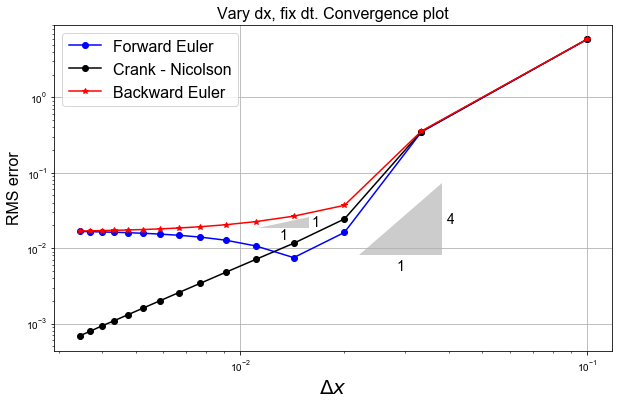

In [19]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=20)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Vary dx, fix dt. Convergence plot', fontsize=16)

ax1.loglog(1./np.array(Ns), errors[0,:], 'bo-', label='Forward Euler')
ax1.loglog(1./np.array(Ns), errors[1,:], 'ko-', label='Crank - Nicolson')
ax1.loglog(1./np.array(Ns), errors[2,:], 'r*-', label='Backward Euler') 
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)
annotation.slope_marker((2.2e-2, 8e-3), (4, 1), ax=ax1,
                         size_frac=0.15, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((1.13e-2, 1.86e-2), (1, 1), ax=ax1,
                         size_frac=0.09, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

## Observations


- The Crank - Nicolson's errors are lower than for the BE and FE rules, and the method converge more rapidly when $\Delta x$ gets smaller.

- It is of order 4 (as confirmed by the convergence plot above).


In [21]:
# Fix dx, vary dt
# mesh data
N_nodes_CG = 51
N_elements_CG = N_nodes_CG - 1
dts = [10**p for p in np.arange(-4,-1,0.3)]
# dts = [0.01/(n) for n in range(1, 30, 5)]

# Initial parameters
U = 1
x0 = 0.5
t = 0.05

# domain size
Lx = 3.
kappa = 0.01

# define some numerical parameters
N_loc = 2
N_gi = 3

# time stepping
t = 0.05
t_end = 1.05
theta_list = [0., 1./2, 1.]
u_ic = adv_diff_analytical_solution(U, kappa, x0, x_nodes, t)

# generate mesh
x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
connectivity_matrix = connectivity(N_loc, N_elements_CG)

# allocate space to store our discretisation matrices
M = np.zeros((N_nodes_CG, N_nodes_CG))
K = np.zeros((N_nodes_CG, N_nodes_CG)) # diffusion discretisation matrix
A1 = np.zeros((N_nodes_CG, N_nodes_CG)) # advection discretisation matrix

# set-up things we need for our discretisation
# the basis functions defined on our reference element
phi = shape(N_loc, N_gi)

# quadrature weights
weight = quadrature(N_gi)

# assemble the individual discretisation matrices
assembly_global(M, K, A1, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

errors = np.zeros((3,len(dts))) # FE, BE, Crank

for i, dt in enumerate(dts):
    print('dt: ', dt) 
    print('Pe_c: {0:.5f}.  Stable: {1}'.format(U*dx[0]/kappa, U*dx[0]/kappa<2))    
    print('CFL:  {0:.5f}.  Stable: {1}'.format(U*dt/dx[0], U*dt/dx[0]<1.))
    print('r:    {0:.5f}.  Stable: {1}'.format(kappa*dt/(dx[0]**2), kappa*dt/(dx[0]**2)<0.5))
    for j, theta in enumerate(theta_list):
        
        t = 0.05
        # and combine them into our final matrix system
        A = M + dt*theta*(kappa*K+U*A1)
        
        RHS_matrix = M - dt*(1-theta)*(kappa*K+U*A1)
        # and finally time step
        u_old = np.copy(u_ic)
        while t<t_end:
        
            b = RHS_matrix @ u_old.T 
            apply_bcs(A, b, 0, 0, bc_option=0) # - Neumann case
            u = sl.solve(A, b)
            u_old = np.copy(u)
            t += dt
            
        x_fine = np.linspace(x_nodes[0],x_nodes[-1],1000)
        errors[j,i] = sl.norm(pwlinear(x_nodes, u, x_fine) - adv_diff_analytical_solution(U, kappa, x0, x_fine, t)) \
                        / np.sqrt(len(x_fine))

dt:  0.0001
Pe_c: 6.00000.  Stable: False
CFL:  0.00167.  Stable: True
r:    0.00028.  Stable: True
dt:  0.00019952623149688788
Pe_c: 6.00000.  Stable: False
CFL:  0.00333.  Stable: True
r:    0.00055.  Stable: True
dt:  0.0003981071705534969
Pe_c: 6.00000.  Stable: False
CFL:  0.00664.  Stable: True
r:    0.00111.  Stable: True
dt:  0.0007943282347242806
Pe_c: 6.00000.  Stable: False
CFL:  0.01324.  Stable: True
r:    0.00221.  Stable: True
dt:  0.0015848931924611108
Pe_c: 6.00000.  Stable: False
CFL:  0.02641.  Stable: True
r:    0.00440.  Stable: True
dt:  0.003162277660168373
Pe_c: 6.00000.  Stable: False
CFL:  0.05270.  Stable: True
r:    0.00878.  Stable: True
dt:  0.006309573444801917
Pe_c: 6.00000.  Stable: False
CFL:  0.10516.  Stable: True
r:    0.01753.  Stable: True
dt:  0.012589254117941637
Pe_c: 6.00000.  Stable: False
CFL:  0.20982.  Stable: True
r:    0.03497.  Stable: True
dt:  0.025118864315095718
Pe_c: 6.00000.  Stable: False
CFL:  0.41865.  Stable: True
r:    0.0697

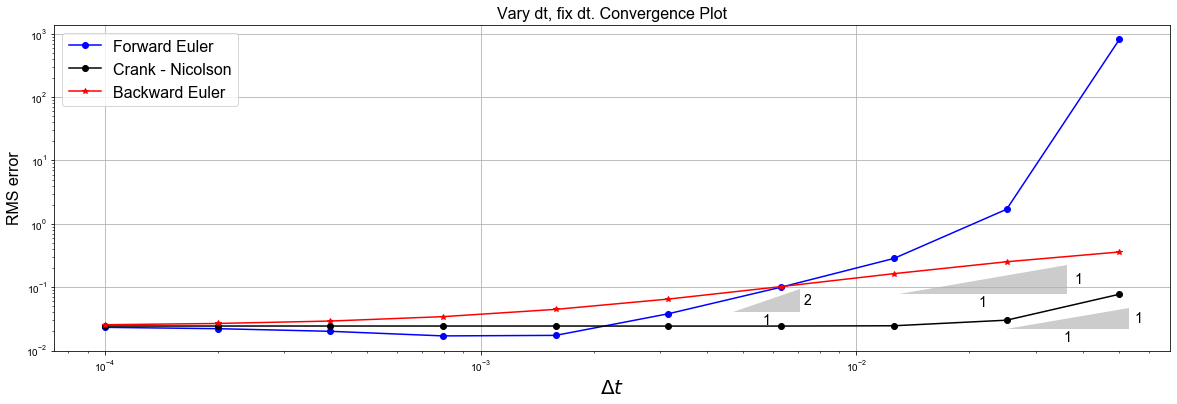

In [23]:
fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta t$', fontsize=20)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Vary dt, fix dt. Convergence Plot', fontsize=16)

ax1.loglog(dts, errors[0,:], 'bo-', label='Forward Euler')
ax1.loglog(dts, errors[1,:], 'ko-', label='Crank - Nicolson')
ax1.loglog(dts, errors[2,:], 'r*-', label='Backward Euler') 
ax1.legend(loc='best', fontsize=16)
ax1.grid(True)
annotation.slope_marker((1.3e-2, 7.9e-2), (1, 1), ax=ax1,
                         size_frac=0.15, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((2.5e-2, 2.2e-2), (1, 1), ax=ax1,
                         size_frac=0.11, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
annotation.slope_marker((4.7e-3, 4.1e-2), (2, 1), ax=ax1,
                         size_frac=0.06, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

## Observations

- Forward Euler and Backward Euler is first- order accurate, and Crank- Nicoson is second-order accurate when varying dt
- Forward Euler has largest error when $\Delta t$ is comparably large.
- Three methods's error converge when $\Delta t$ get very small.